# 

# overlay the Z maps from each fractional task

In [1]:
import numpy as np
import pandas as pd
import os, glob, re
from os.path import join
from pathlib import Path
import nilearn
import argparse
from nilearn import image, plotting
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm import threshold_stats_img
import matplotlib.pyplot as plt
from scipy.stats import norm
from nilearn.glm import cluster_level_inference
from nilearn import plotting
from nilearn.glm.second_level import SecondLevelModel


In [3]:
second_dir = '/Volumes/spacetop_projects_fractional/analysis/fmri/nilearn/glm/2ndlevel'

In [23]:
memorynii = image.load_img(join(second_dir, 'second-level_task-memory_con-01_desc-encodeGTretrieval_stat-betamap.nii.gz'))
memorynii = image.load_img(join(second_dir, 'second-level_task-memory_con-02_desc-encodeGTmath_stat-betamap.nii.gz'))
posnernii = image.load_img(join(second_dir, 'second-level_task-posner_con-01_desc-invalidGTvalid_stat-betamap.nii.gz'))
saxenii   = image.load_img(join(second_dir, 'second-level_task-tomsaxe_con-01_desc-beliefGTphoto_stat-betamap.nii.gz'))
spuntnii  = image.load_img(join(second_dir, 'second-level_task-tomspunt_con-02_desc-howGTwhy_stat-betamap.nii.gz'))

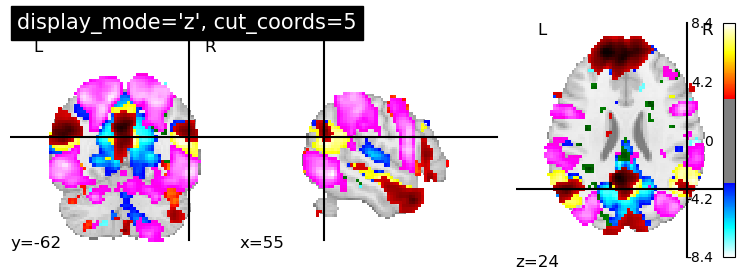

In [24]:
display = plotting.plot_stat_map(memorynii,
                                # display_mode='mosaic',
                                 cut_coords=(55, -62, 24),
                                 threshold=3,
                                 title="display_mode='z', cut_coords=5")
                                #  cmap=plotting.cm.black_yellow)
display.add_overlay(posnernii, cmap=plotting.cm.black_blue, threshold=3)
display.add_overlay(saxenii, cmap=plotting.cm.black_green, threshold=3)
display.add_overlay(spuntnii, cmap=plotting.cm.black_pink, threshold=3)


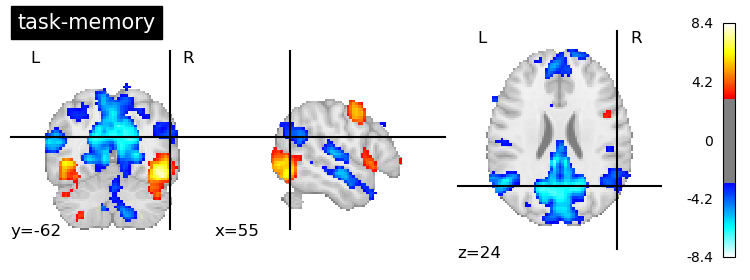

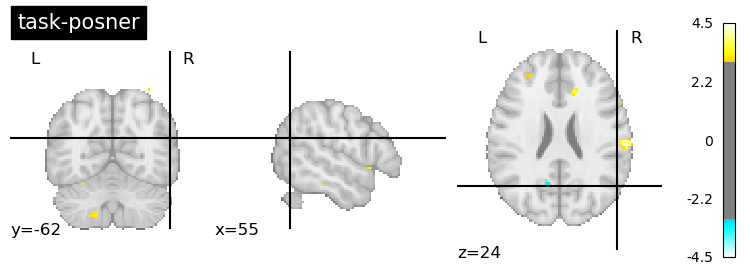

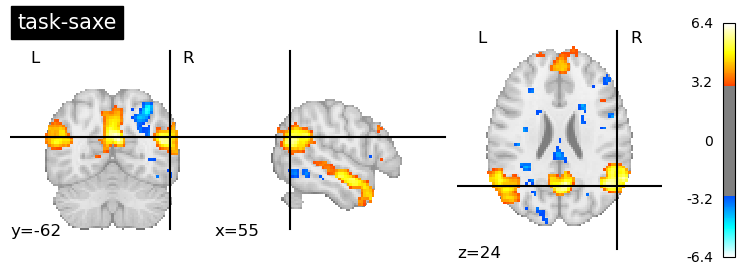

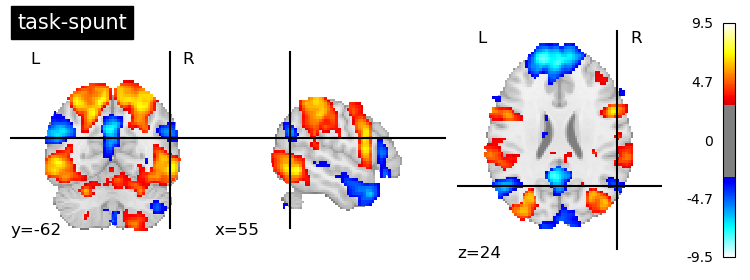

In [79]:
plotting.plot_stat_map(memorynii, cut_coords=(55, -62, 24), threshold=3, title="task-memory")
plotting.plot_stat_map(posnernii, cut_coords=(55, -62, 24), threshold=3, title="task-posner")
plotting.plot_stat_map(saxenii, cut_coords=(55, -62, 24), threshold=3, title="task-saxe")
plotting.plot_stat_map(spuntnii, cut_coords=(55, -62, 24), threshold=3, title="task-spunt")


# surfplot

In [26]:
from neuromaps.transforms import mni152_to_fslr
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from surfplot.utils import threshold

memory_lh, memory_rh = mni152_to_fslr(memorynii)
posner_lh, posner_rh = mni152_to_fslr(posnernii)
saxe_lh, saxe_rh     = mni152_to_fslr(saxenii)
spunt_lh, spunt_rh   = mni152_to_fslr(spuntnii)

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/1124261006.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


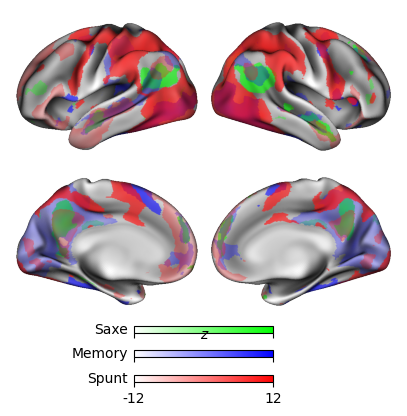

In [74]:
# threshold after projection to avoid interpolation artefacts
memory3_lh = threshold(memory_lh.agg_data(), 3)
memory3_rh = threshold(memory_rh.agg_data(), 3)

saxe3_lh = threshold(saxe_lh.agg_data(), 3)
saxe3_rh = threshold(saxe_rh.agg_data(), 3)

spunt3_lh = threshold(spunt_lh.agg_data(), 3)
spunt3_rh = threshold(spunt_rh.agg_data(), 3)

#   -> get surfaces + sulc maps
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
sulc_lh, sulc_rh = surfaces['sulc']

color_range = (-12, 12)


p = Plot(lh, rh)
p.add_layer({'left': sulc_lh, 'right': sulc_rh}, cmap='binary_r', cbar=False)

#   -> add statistical maps
p.add_layer({'left': saxe3_lh, 'right': saxe3_rh}, cmap=nilearn_cmaps['green_transparent_full_alpha_range'],
            color_range=color_range, cbar_label='Saxe')

p.add_layer({'left': memory3_lh, 'right': memory3_rh}, cmap=nilearn_cmaps['blue_transparent_full_alpha_range'],
            color_range=color_range, cbar_label='Memory')

p.add_layer({'left': spunt3_lh, 'right': spunt3_rh}, cmap=nilearn_cmaps['red_transparent_full_alpha_range'],
            color_range=color_range, cbar_label='Spunt')
cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)

#   -> build figure
fig = p.build(cbar_kws=cbar_kws)
fig.axes[3].set_xlabel('z', labelpad=-11, fontstyle='italic')
fig.show()

In [81]:
def task_surf(task_lh, task_rh, cmap_key, cmap_range, cbar_label):
    # get surfaces + sulc maps
    surfaces = fetch_fslr()
    lh, rh = surfaces['inflated']
    sulc_lh, sulc_rh = surfaces['sulc']

    p = Plot(lh, rh)
    p.add_layer({'left': sulc_lh, 'right': sulc_rh}, cmap='binary_r', cbar=False)

    p.add_layer({'left': task_lh, 'right': task_rh}, cmap=nilearn_cmaps[cmap_key],
                color_range=cmap_range, cbar_label=cbar_label)

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)
    fig = p.build(cbar_kws=cbar_kws)
    # add units to colorbar
    fig.axes[1].set_xlabel('z', labelpad=-11, fontstyle='italic')
    fig.show()

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/449593232.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/449593232.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/449593232.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


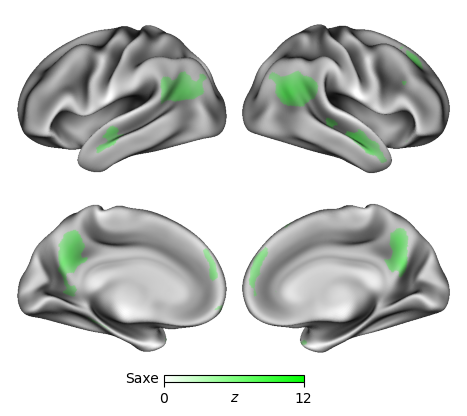

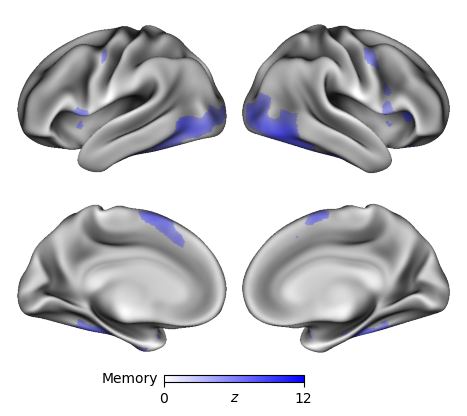

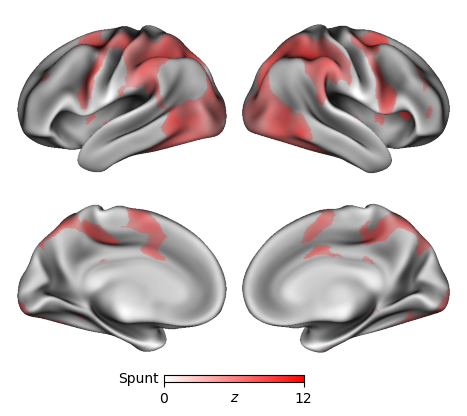

In [82]:
task_surf(saxe3_lh, saxe3_rh, cmap_key='green_transparent_full_alpha_range', cmap_range=(0,12), cbar_label='Saxe')
task_surf(memory3_lh, memory3_rh, cmap_key='blue_transparent_full_alpha_range', cmap_range=(0,12), cbar_label='Memory')
task_surf(spunt3_lh, spunt3_rh, cmap_key='red_transparent_full_alpha_range', cmap_range=(0,12), cbar_label='Spunt')

# button press (Saxe, Spunt)

In [64]:
saxepress = image.load_img(join(second_dir, 'second-level_task-tomsaxe_con-02_desc-rating_stat-betamap.nii.gz'))
spuntpress = image.load_img(join(second_dir, 'second-level_task-tomspunt_con-04_desc-rating_stat-betamap.nii.gz'))


/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/1547271454.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


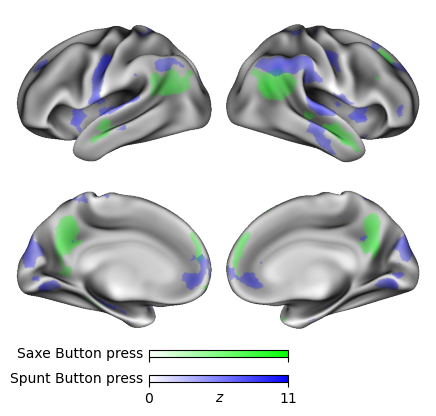

In [68]:
saxepress_lh, saxepress_rh = mni152_to_fslr(saxepress)
spuntpress_lh, spuntpress_rh = mni152_to_fslr(spuntpress)

saxepress3_lh = threshold(saxepress_lh.agg_data(), 3)
saxepress3_rh = threshold(saxepress_rh.agg_data(), 3)

spuntpress3_lh = threshold(spuntpress_lh.agg_data(), 3)
spuntpress3_rh = threshold(spuntpress_rh.agg_data(), 3)

# get surfaces + sulc maps
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
sulc_lh, sulc_rh = surfaces['sulc']

color_range = (0, 12)

p = Plot(lh, rh)
p.add_layer({'left': sulc_lh, 'right': sulc_rh}, cmap='binary_r', cbar=False)

# cold_hot is a common diverging colormap for neuroimaging

p.add_layer({'left': saxepress3_lh, 'right': saxepress3_rh}, cmap=nilearn_cmaps['green_transparent_full_alpha_range'],
            color_range=(0, 11), cbar_label='Saxe Button press')

p.add_layer({'left': spuntpress3_lh, 'right': spuntpress3_rh}, cmap=nilearn_cmaps['blue_transparent_full_alpha_range'],
            color_range=(0, 11), cbar_label='Spunt Button press')

cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)
fig = p.build(cbar_kws=cbar_kws)
# add units to colorbar
fig.axes[1].set_xlabel('z', labelpad=-11, fontstyle='italic')
fig.show()

# Correlation with Margulies Functional Gradient

In [107]:
from neuromaps.datasets import fetch_annotation
from neuromaps.stats import compare_images
from neuromaps import transforms
import nibabel as nib
fcgradient01 = fetch_annotation(source='margulies2016', desc='fcgradient01', space='fsLR', den='32k')
fcgradient02 = fetch_annotation(source='margulies2016', desc='fcgradient02', space='fsLR', den='32k')
fcgradient03 = fetch_annotation(source='margulies2016', desc='fcgradient03', space='fsLR', den='32k')
# fcgradient = transforms.fsaverage_to_fslr(fc_grad, '32k')
# fc_grad_memory = memory_lh.fit_transform(fcgradient, 'fsLR')


/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/449593232.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/449593232.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/449593232.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


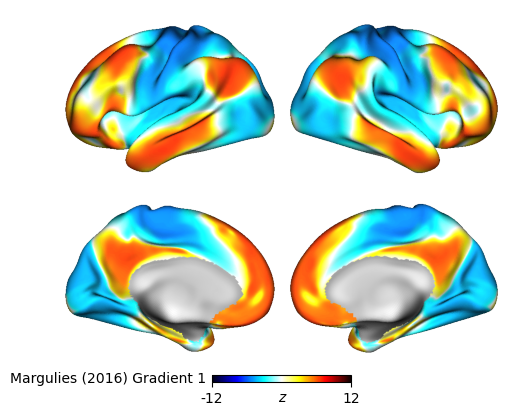

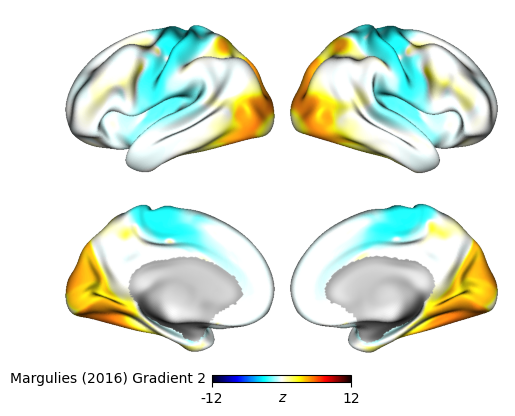

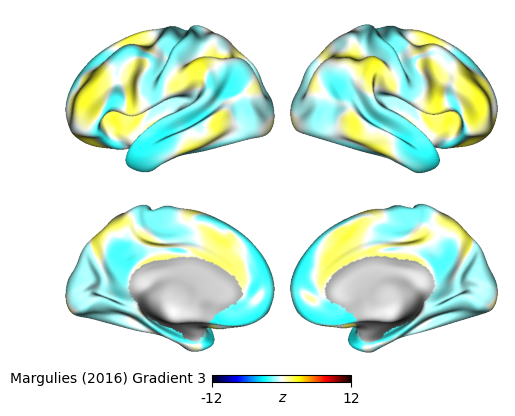

In [133]:
task_surf(fcgradient01[0], fcgradient01[1], cmap_key='cold_white_hot', cmap_range=(-12,12), cbar_label='Margulies (2016) Gradient 1')
task_surf(fcgradient02[0], fcgradient02[1], cmap_key='cold_white_hot', cmap_range=(-12,12), cbar_label='Margulies (2016) Gradient 2')
task_surf(fcgradient03[0], fcgradient03[1], cmap_key='cold_white_hot', cmap_range=(-12,12), cbar_label='Margulies (2016) Gradient 3')

In [120]:
corr01lh = compare_images(fcgradient01[0], memory_lh, metric='pearsonr')
corr01rh = compare_images(fcgradient01[1], memory_rh, metric='pearsonr')
print(f'task-memory lh r = {corr01lh:.3f};', f'rh r = {corr01rh:.3f}')

corr02lh = compare_images(fcgradient02[0], memory_lh, metric='pearsonr')
corr02rh = compare_images(fcgradient02[1], memory_rh, metric='pearsonr')
print(f'task-memory lh r = {corr02lh:.3f};', f'rh r = {corr02rh:.3f}')

corr03lh = compare_images(fcgradient03[0], memory_lh, metric='pearsonr')
corr03rh = compare_images(fcgradient03[1], memory_rh, metric='pearsonr')
print(f'task-memory lh r = {corr03lh:.3f};', f'rh r = {corr03rh:.3f}')

task-memory lh r = -0.037; rh r = -0.111
task-memory lh r = -0.032; rh r = 0.050
task-memory lh r = 0.152; rh r = 0.167


In [119]:
corr01lh = compare_images(fcgradient01[0], saxe_lh, metric='pearsonr')
corr01rh = compare_images(fcgradient01[1], saxe_rh, metric='pearsonr')
print(f'task-saxe lh r = {corr01lh:.3f};', f'rh r = {corr01rh:.3f}')

corr02lh = compare_images(fcgradient02[0], saxe_lh, metric='pearsonr')
corr02rh = compare_images(fcgradient02[1], saxe_rh, metric='pearsonr')
print(f'task-saxe lh r = {corr02lh:.3f};', f'rh r = {corr02rh:.3f}')

corr03lh = compare_images(fcgradient03[0], saxe_lh, metric='pearsonr')
corr03rh = compare_images(fcgradient03[1], saxe_rh, metric='pearsonr')
print(f'task-saxe lh r = {corr03lh:.3f};', f'rh r = {corr03rh:.3f}')

task-saxe lh r = 0.402; rh r = 0.488
task-saxe lh r = -0.091; rh r = -0.060
task-saxe lh r = -0.475; rh r = -0.387


In [118]:
corr01lh = compare_images(fcgradient01[0], spunt_lh, metric='pearsonr')
corr01rh = compare_images(fcgradient01[1], spunt_rh, metric='pearsonr')
print(f'task-spunt lh r = {corr01lh:.3f};', f'rh r = {corr01rh:.3f}')

corr02lh = compare_images(fcgradient02[0], spunt_lh, metric='pearsonr')
corr02rh = compare_images(fcgradient02[1], spunt_rh, metric='pearsonr')
print(f'task-spunt lh r = {corr02lh:.3f};', f'rh r = {corr02rh:.3f}')

corr03lh = compare_images(fcgradient03[0], spunt_lh, metric='pearsonr')
corr03rh = compare_images(fcgradient03[1], spunt_rh, metric='pearsonr')
print(f'task-spunt lh r = {corr03lh:.3f};', f'rh r = {corr03rh:.3f}')

task-spunt lh r = -0.601; rh r = -0.444
task-spunt lh r = 0.107; rh r = 0.202
task-spunt lh r = 0.530; rh r = 0.561
